In [1]:
from data import build_dataframe, DataLoader
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
!export CUDA_VISIBLE_DEVICES=MIG-4f7fbfb7-a8a2-553d-875a-d9d56baf97a5

In [25]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

# Exploration

In this notebook I explore our dataset a bit.

In [2]:
!ls data

ColorfulOriginal  Gray	test.csv  train.csv


In [3]:
df = build_dataframe("data/ColorfulOriginal", "data/Gray")
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["label"])
df_train

,gray_path,colorful_path,label
94,data/Gray/Tomato/Tomato37.jpg,data/ColorfulOriginal/Tomato/Tomato37.jpg,Tomato
596,data/Gray/Cucumber/cucumber17.jpg,data/ColorfulOriginal/Cucumber/cucumber17.jpg,Cucumber
138,data/Gray/Strawberry/Strawberry12.jpg,data/ColorfulOriginal/Strawberry/Strawberry12.jpg,Strawberry
262,data/Gray/Plum/Plum30.jpg,data/ColorfulOriginal/Plum/Plum30.jpg,Plum
661,data/Gray/Corn/Corn32.jpg,data/ColorfulOriginal/Corn/Corn32.jpg,Corn
...,...,...,...
340,data/Gray/Broccoli/Broccoli33.jpg,data/ColorfulOriginal/Broccoli/Broccoli33.jpg,Broccoli
123,data/Gray/Tomato/Tomato29.jpg,data/ColorfulOriginal/Tomato/Tomato29.jpg,Tomato
193,data/Gray/Banana/banana39.jpg,data/ColorfulOriginal/Banana/banana39.jpg,Banana
622,data/Gray/Cucumber/cucumber28.jpg,data/ColorfulOriginal/Cucumber/cucumber28.jpg,Cucumber


In [4]:
df_train.to_csv("data/train.csv", index=False)
df_test.to_csv("data/test.csv", index=False)

In [5]:
pd.read_csv("data/train.csv")

,gray_path,colorful_path,label
0,data/Gray/Tomato/Tomato37.jpg,data/ColorfulOriginal/Tomato/Tomato37.jpg,Tomato
1,data/Gray/Cucumber/cucumber17.jpg,data/ColorfulOriginal/Cucumber/cucumber17.jpg,Cucumber
2,data/Gray/Strawberry/Strawberry12.jpg,data/ColorfulOriginal/Strawberry/Strawberry12.jpg,Strawberry
3,data/Gray/Plum/Plum30.jpg,data/ColorfulOriginal/Plum/Plum30.jpg,Plum
4,data/Gray/Corn/Corn32.jpg,data/ColorfulOriginal/Corn/Corn32.jpg,Corn
...,...,...,...
551,data/Gray/Broccoli/Broccoli33.jpg,data/ColorfulOriginal/Broccoli/Broccoli33.jpg,Broccoli
552,data/Gray/Tomato/Tomato29.jpg,data/ColorfulOriginal/Tomato/Tomato29.jpg,Tomato
553,data/Gray/Banana/banana39.jpg,data/ColorfulOriginal/Banana/banana39.jpg,Banana
554,data/Gray/Cucumber/cucumber28.jpg,data/ColorfulOriginal/Cucumber/cucumber28.jpg,Cucumber


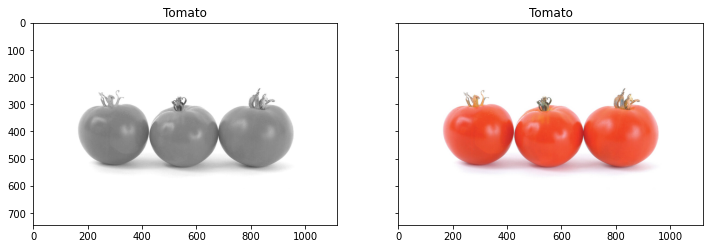

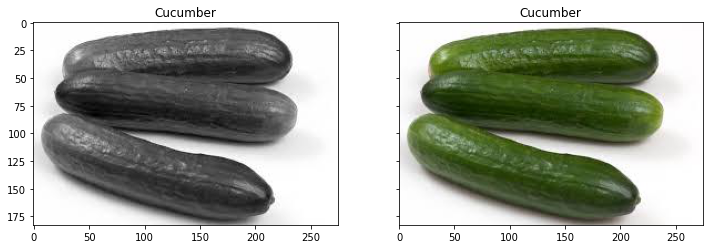

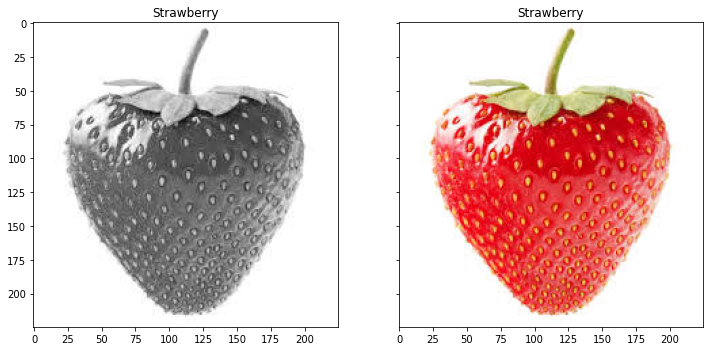

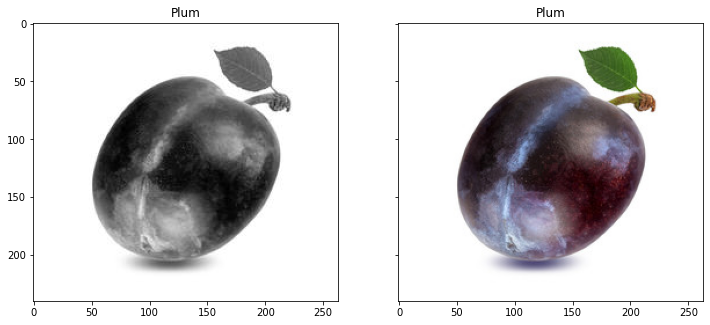

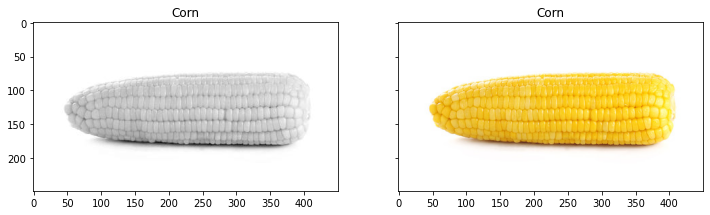

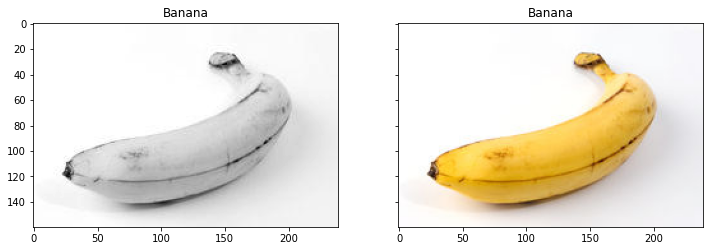

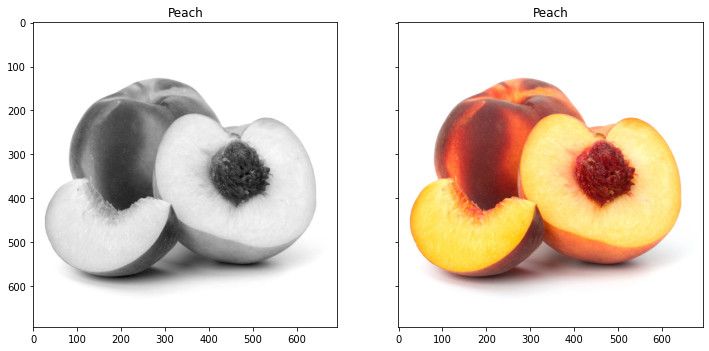

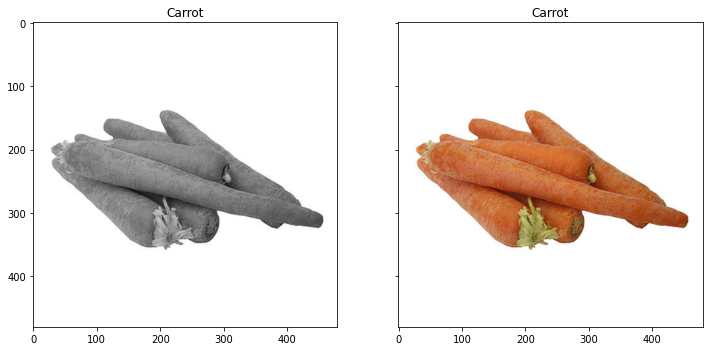

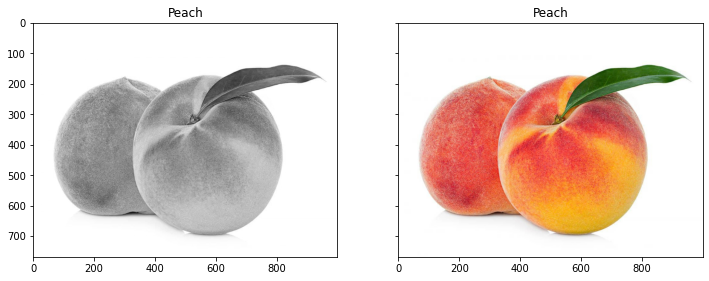

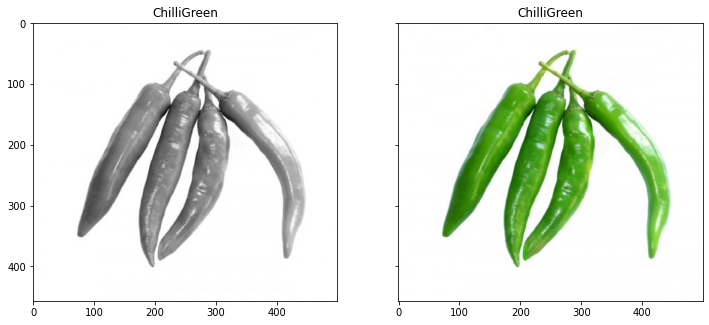

In [6]:
for _, row in df_train[:10].iterrows():
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
    ax1.imshow(plt.imread(row["gray_path"]), cmap="gray")
    ax2.imshow(plt.imread(row["colorful_path"]))
    ax1.set_title(row["label"])
    ax2.set_title(row["label"])

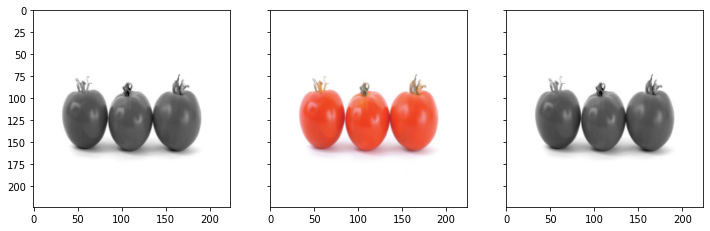

In [8]:
# try out data loader
train_loader = DataLoader(pd.read_csv("data/train.csv"))

gray, color, gray_lab, color_lab, enc_labels, labels = train_loader[0]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(gray[0][:, :, 0], cmap="gray")
ax2.imshow(color[0])
ax3.imshow(gray_lab[0][:, :, 0], cmap="gray")
#ax4.imshow(np.concatenate(gray_lab, color_lab))

In [9]:
gray.shape, color.shape, gray_lab.shape, color_lab.shape, enc_labels.shape, labels.shape

((16, 224, 224, 1),
 (16, 224, 224, 3),
 (16, 224, 224, 1),
 (16, 224, 224, 2),
 TensorShape([Dimension(16), Dimension(20)]),
 (16,))

In [19]:
np.concatenate((gray_lab, color_lab), axis=3).shape

(16, 224, 224, 3)

In [14]:
gray_lab.shape

(16, 224, 224, 1)

In [15]:
color_lab.shape

(16, 224, 224, 2)

In [17]:
type(gray_lab)

numpy.ndarray